# Petfinder API
We found our dog Emmy (a mixed breed herding dog named after the German mathematician Emmy Noether) on petfinder.com.
They also provide an API, which let's you access their data in your own applications, and here on Jupyter.

In [14]:
import requests
import requests_cache
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
requests_cache.install_cache('pet_cache')

In [83]:
key = "12345" #get your own key!

Let's get the dog breeds from petfinder.  The breed_uri variable specifies my key (you will need your own), the method that I want to use, breed.list, the species, and the format of the output (JSON).  This format is specific to the petfinder api (<a href="https://www.petfinder.com/developers/api-docs">you can look at the documentation</a>).

In [84]:
breed_uri = "http://api.petfinder.com/breed.list?key={}&animal=dog&format=json".format(key)
print(breed_uri)

http://api.petfinder.com/breed.list?key=12345&animal=dog&format=json


In [16]:
req = requests.get(breed_uri)
js = req.json()

The output is a JSON object, which is really just dictionaries and lists.  So, it will be a dictionary that could have values as dictionaries or lists.  These lists can then have dictionaries as elements, and so on.  Turtles all the way down.

In [17]:
print(js.keys())

dict_keys(['@encoding', '@version', 'petfinder'])


In [296]:
js[u'petfinder'].keys()

[u'header', u'@xmlns:xsi', u'@xsi:noNamespaceSchemaLocation', u'breeds']

In [18]:
js[u'petfinder'][u'breeds']

{'@animal': 'dog',
 'breed': [{'$t': 'Affenpinscher'},
  {'$t': 'Afghan Hound'},
  {'$t': 'Airedale Terrier'},
  {'$t': 'Akbash'},
  {'$t': 'Akita'},
  {'$t': 'Alaskan Malamute'},
  {'$t': 'American Bulldog'},
  {'$t': 'American Eskimo Dog'},
  {'$t': 'American Hairless Terrier'},
  {'$t': 'American Staffordshire Terrier'},
  {'$t': 'American Water Spaniel'},
  {'$t': 'Anatolian Shepherd'},
  {'$t': 'Appenzell Mountain Dog'},
  {'$t': 'Australian Cattle Dog / Blue Heeler'},
  {'$t': 'Australian Kelpie'},
  {'$t': 'Australian Shepherd'},
  {'$t': 'Australian Terrier'},
  {'$t': 'Basenji'},
  {'$t': 'Basset Hound'},
  {'$t': 'Beagle'},
  {'$t': 'Bearded Collie'},
  {'$t': 'Beauceron'},
  {'$t': 'Bedlington Terrier'},
  {'$t': 'Belgian Shepherd / Laekenois'},
  {'$t': 'Belgian Shepherd / Malinois'},
  {'$t': 'Belgian Shepherd / Sheepdog'},
  {'$t': 'Belgian Shepherd / Tervuren'},
  {'$t': 'Bernese Mountain Dog'},
  {'$t': 'Bichon Frise'},
  {'$t': 'Black and Tan Coonhound'},
  {'$t': 'Bla

In [19]:
breeds = [b[u'$t'] for b in js['petfinder']['breeds']['breed']]

In [21]:
print(", ".join(breeds))

Affenpinscher, Afghan Hound, Airedale Terrier, Akbash, Akita, Alaskan Malamute, American Bulldog, American Eskimo Dog, American Hairless Terrier, American Staffordshire Terrier, American Water Spaniel, Anatolian Shepherd, Appenzell Mountain Dog, Australian Cattle Dog / Blue Heeler, Australian Kelpie, Australian Shepherd, Australian Terrier, Basenji, Basset Hound, Beagle, Bearded Collie, Beauceron, Bedlington Terrier, Belgian Shepherd / Laekenois, Belgian Shepherd / Malinois, Belgian Shepherd / Sheepdog, Belgian Shepherd / Tervuren, Bernese Mountain Dog, Bichon Frise, Black and Tan Coonhound, Black Labrador Retriever, Black Mouth Cur, Black Russian Terrier, Bloodhound, Blue Lacy, Bluetick Coonhound, Boerboel, Bolognese, Border Collie, Border Terrier, Borzoi, Boston Terrier, Bouvier des Flanders, Boxer, Boykin Spaniel, Briard, Brittany Spaniel, Brussels Griffon, Bull Terrier, Bullmastiff, Cairn Terrier, Canaan Dog, Cane Corso Mastiff, Carolina Dog, Catahoula Leopard Dog, Cattle Dog, Cauc

Petfinder also provides the pet.getRandom method that let's you get a random animal of a specified species.

In [24]:
pet_url_ex = "http://api.petfinder.com/pet.getRandom"
randomparms = {'key':key,'animal':'dog','format':'json','output':'basic'}
randreq = requests.get(pet_url_ex,params = randomparms)
js = randreq.json()

In [25]:
js

{'@encoding': 'iso-8859-1',
 '@version': '1.0',
 'petfinder': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xsi:noNamespaceSchemaLocation': 'http://api.petfinder.com/schemas/0.9/petfinder.xsd',
  'header': {'status': {'code': {'$t': '100'}, 'message': {}},
   'timestamp': {'$t': '2018-02-14T23:06:29Z'},
   'version': {'$t': '0.1'}},
  'pet': {'age': {'$t': 'Young'},
   'animal': {'$t': 'Dog'},
   'breeds': {'breed': {'$t': 'Black Labrador Retriever'}},
   'contact': {'address1': {},
    'address2': {},
    'city': {'$t': 'Calgary'},
    'email': {'$t': 'hope4critters@gmail.com'},
    'fax': {},
    'phone': {'$t': '4037101732'},
    'state': {'$t': 'AB'},
    'zip': {'$t': 'T2B 2T4'}},
   'description': {'$t': 'Autumn came into our care from a rescue in the Yukon. She arrived in September and half way through her term of pregnancy,  Her pups were born October 5 and have all gone to their furever homes. Autumn is ready to find her human, she is up to date on her shots 

In [40]:
def print_pet(js):
    """
    Input: Petfinder JSON object from getRandom method
    Output: String describing the pet
    """
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'] for a in breed_obj]
        breed = ", ".join(breeds) + " mix"
    else:
        breed = breed_obj[u'$t']
    name = js[u'petfinder'][u'pet'][u'name'][u'$t']
    desc = js[u'petfinder'][u'pet'][u'description'][u'$t']
    return "{} is a {}. {}".format(name,breed,desc)

In [41]:
js[u'petfinder'][u'pet'][u'breeds'][u'breed'][u'$t']

'Black Labrador Retriever'

In [42]:
print(print_pet(js))

Autumn is a Black Labrador Retriever. Autumn came into our care from a rescue in the Yukon. She arrived in September and half way through her term of pregnancy,  Her pups were born October 5 and have all gone to their furever homes. Autumn is ready to find her human, she is up to date on her shots and has been spayed. She is a very active lab mix who will need a lot of exercise and love. She would do best as the only pet in the household, even though she gets along with other animals she needs a human all to herself. If you are looking for a new hiking partner or running coach Autumn is the dog for you!


Let's try to get at the image links for this dog.

In [43]:
image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
image_recs

[{'$t': 'http://photos.petfinder.com/photos/pets/39894236/1/?bust=1510461749&width=60&-pnt.jpg',
  '@id': '1',
  '@size': 'pnt'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/1/?bust=1510461749&width=95&-fpm.jpg',
  '@id': '1',
  '@size': 'fpm'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/1/?bust=1510461749&width=500&-x.jpg',
  '@id': '1',
  '@size': 'x'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/1/?bust=1510461749&width=300&-pn.jpg',
  '@id': '1',
  '@size': 'pn'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/1/?bust=1510461749&width=50&-t.jpg',
  '@id': '1',
  '@size': 't'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/2/?bust=1510461757&width=60&-pnt.jpg',
  '@id': '2',
  '@size': 'pnt'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/2/?bust=1510461757&width=95&-fpm.jpg',
  '@id': '2',
  '@size': 'fpm'},
 {'$t': 'http://photos.petfinder.com/photos/pets/39894236/2/?bust=1510461757&width=500&-x.jpg',
  

In [46]:
from IPython.display import HTML

In [47]:
def display_pet(js):
    """
    Input: petfinder json object
    Output: html string with image
    """
    try:
        image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
    except KeyError:
        return ""
    for rec in image_recs:
        image_uri = rec['$t']
        if rec['@size'] == u'x':
            break
    return "<center><img src='{}'></center>".format(image_uri)

In [48]:
HTML(display_pet(js) + print_pet(js)) 
#Both functions return html strings and HTML will display that

Let's make it easy to get a random dog, since we'll be doing it many times.

In [315]:
print pet_url.__doc__


    Input: api key and parameters for the query
    Output: a url string
    


In [54]:
def random_dog(key):
    """
    Input: api key
    Output: HTML description of the dog
    """
    pet_url_ex = "http://api.petfinder.com/pet.getRandom"
    randomparms = {'key':key,'animal':'dog','format':'json','output':'basic'}
    randreq = requests.get(pet_url_ex,params = randomparms)
    js = randreq.json()
    return js

In [64]:
with requests_cache.disabled():
    js = random_dog(key)
HTML(display_pet(js) + print_pet(js)) 
# except KeyError:
#     print("Poor format from petfinder.")

# Breed Statistics

Let's do some statistics.  We have a way of getting a random dog, so we can obtain a sample.  I'm interested in the breed distribution for example.

In [65]:
from collections import Counter

def random_dog_breed(key):
    """
    Get a random dog and return the breed
    Input: api key
    Output: counter object of dog breeds
    """
#     pet_uri = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=full".format(key)
#     req = requests.get(pet_uri)
    js = random_dog(key)
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'] for a in breed_obj]
        breed_counter = Counter({b:1 for b in breeds})
    else:
        breed_counter = Counter({breed_obj[u'$t']: 1})
    return breed_counter

In [75]:
tsize = 500
with requests_cache.disabled():
    Breed_dist = sum((random_dog_breed(key) for i in range(tsize)),Counter())

In [76]:
common_breeds = Breed_dist.most_common(10)

In [77]:
common_breeds

[('Pit Bull Terrier', 89),
 ('Labrador Retriever', 74),
 ('Mixed Breed', 62),
 ('Terrier', 39),
 ('Chihuahua', 38),
 ('German Shepherd Dog', 27),
 ('Shepherd', 27),
 ('Hound', 25),
 ('American Bulldog', 24),
 ('Boxer', 23)]

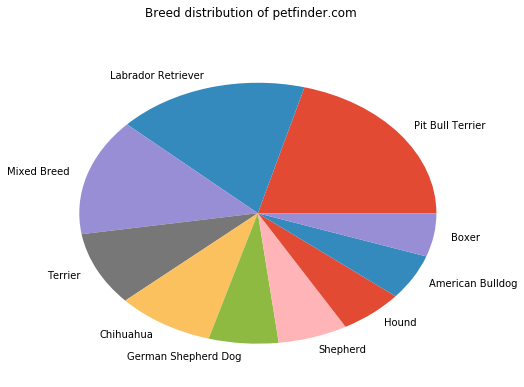

In [81]:
_ = plt.figure(figsize=(8,6))
_ = plt.pie([c[1] for c in common_breeds],labels=[c[0] for c in common_breeds])
_ = plt.suptitle('Breed distribution of petfinder.com')